In [30]:
# Importing lib
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages #It's recommended when working with BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import BaseMessage, HumanMessage #BaseMessage is somewhat which rep that list can have all type of message
from typing import TypedDict, Annotated
from dotenv import load_dotenv

In [31]:
load_dotenv()
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

In [32]:
# Creating state
class ChatState(TypedDict):
    message: Annotated[list[BaseMessage], add_messages]

In [33]:
def chat_node(state: ChatState):
    # take user query from state
    message = state['message']
    # Send it to llm
    response = llm.invoke(message)
    # response store to state
    return {"message": [response]}

In [34]:
# Creating graph
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

# Creating node
graph.add_node("chat_node", chat_node)

# Graph edge
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

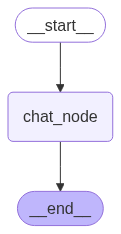

In [35]:
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [40]:
thread_id = '1'
config = {"configurable": {'thread_id': thread_id}}
initial_state = {'message': [HumanMessage("What's my name?")]} 
final_state = workflow.invoke(initial_state, config=config)
final_state

{'message': [HumanMessage(content="What's the capital of france", additional_kwargs={}, response_metadata={}, id='7ca3b143-1227-4bae-b94c-03bf361620e3'),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 41, 'total_tokens': 49, 'completion_time': 0.000532786, 'prompt_time': 0.0984896, 'queue_time': 0.125124199, 'total_time': 0.099022386}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_2115512ff6', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--e66406c0-6db9-4a68-9724-3deffbfb9b41-0', usage_metadata={'input_tokens': 41, 'output_tokens': 8, 'total_tokens': 49}),
  HumanMessage(content="What's the capital of India", additional_kwargs={}, response_metadata={}, id='9426bd59-7902-49e5-954a-5ed2ae4db8c1'),
  AIMessage(content='The capital of India is New Delhi.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 

In [ ]:
thread_id = '1'
while True:
    user_msg = input("Enter Text here")
    print("User msg: ", user_msg)
    if user_msg.strip().lower() in ["break", "exit", "bye"]:
        break
    
    config = {"configurable": {'thread_id': thread_id}}
    response = workflow.invoke({"message": user_msg}, config=config)
    print(response["message"][-1].content)

User msg:  Hii
How's it going? Is there something I can help you with or would you like to chat?
User msg:  My name is srijan
Nice to meet you, Srijan. It's great to have you here. How's your day going so far?
User msg:  What's my name again?
Your name is Srijan.
User msg:  exit
